# Linear regression
We can apply all concepts that we already know

Our code should consist of several parts:
1) prepare data  
2) design a model (input/output size, forward pass)  
3) construct loss and optimizer  
4) training loop:
-  forward pass: compute predictions and loss
-  backward pass: BackProp algorithm -> calculate gradients
-  update weights

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

## Data preparing

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=1000, n_features=1, noise=20)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(f'Size of X: {X.shape}')
print(f'Size of y: {y.shape}')

Size of X: torch.Size([1000, 1])
Size of y: torch.Size([1000])


`y` should be a vector-column (we should put label for each object in independent row)

In [3]:
y = y.reshape(-1, 1)
print(f'Size of y: {y.shape}')

Size of y: torch.Size([1000, 1])


In [4]:
n_samples, n_features = X.shape

## Design a model
In the linear regression case there is only one layer, which has input size equal to number of features, and  the output size equal to 1 (because we have only one response for each object)

In [5]:
model = nn.Linear(in_features=n_features, out_features=1)

## Construct loss and optimizer

In [6]:
learning_rate = 1e-3

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

## training loop

In [7]:
number_of_epoches = 1500
loss_array = []

for epoch in range(number_of_epoches):
    # forward pass
    y_pred = model(X)
    loss = criterion(y_pred, y)
    loss_array.append(loss.item())
    # backward pass
    loss.backward()
    # update weights
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch №{epoch+1}: loss = {loss.item():.4f}')

epoch №10: loss = 6722.9927
epoch №20: loss = 6479.9741
epoch №30: loss = 6246.3071
epoch №40: loss = 6021.6299
epoch №50: loss = 5805.5962
epoch №60: loss = 5597.8730
epoch №70: loss = 5398.1387
epoch №80: loss = 5206.0859
epoch №90: loss = 5021.4194
epoch №100: loss = 4843.8545
epoch №110: loss = 4673.1172
epoch №120: loss = 4508.9434
epoch №130: loss = 4351.0811
epoch №140: loss = 4199.2881
epoch №150: loss = 4053.3291
epoch №160: loss = 3912.9800
epoch №170: loss = 3778.0249
epoch №180: loss = 3648.2554
epoch №190: loss = 3523.4724
epoch №200: loss = 3403.4832
epoch №210: loss = 3288.1042
epoch №220: loss = 3177.1577
epoch №230: loss = 3070.4722
epoch №240: loss = 2967.8850
epoch №250: loss = 2869.2375
epoch №260: loss = 2774.3784
epoch №270: loss = 2683.1619
epoch №280: loss = 2595.4473
epoch №290: loss = 2511.1006
epoch №300: loss = 2429.9915
epoch №310: loss = 2351.9956
epoch №320: loss = 2276.9934
epoch №330: loss = 2204.8706
epoch №340: loss = 2135.5149
epoch №350: loss = 2068

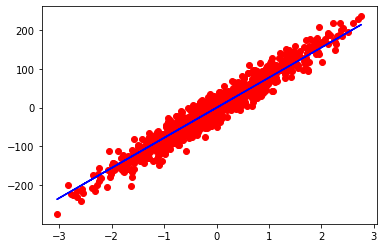

In [8]:
predicted_all_data = model(X).detach().numpy()
# detach is need for create tensor which does not require grad
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted_all_data, 'b')

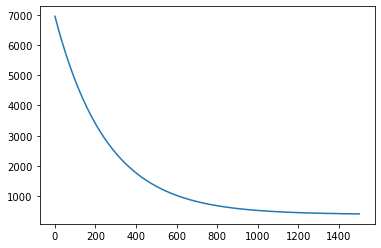

In [9]:
# plot our loss
plt.plot(np.arange(1, number_of_epoches+1), loss_array)